In [68]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [69]:
entire_df = pd.read_csv('data.csv')
entire_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [70]:
train, validation = train_test_split(entire_df, test_size=0.3, random_state=42)
train, test = train_test_split(train, test_size=30, random_state=42)

In [71]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0:1]
y_train = y_train.values.ravel() # flattens the df to 1-dim array

x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0:1]
y_test = y_test.values.ravel()

In [93]:
from sklearn.linear_model import LassoCV

# Utwórz obiekt LassoCV z listą wartości parametru kary (alphas)
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], max_iter = 5000, cv=5)

# Dopasuj model do danych treningowych
lasso_cv.fit(x_train, y_train)

# Wybierz najlepszą wartość alpha
best_alpha = lasso_cv.alpha_
print("Najlepsza wartość alpha:", best_alpha)

# Score dla danych treningowych i testowych
train_score = lasso_cv.score(x_train, y_train)
test_score = lasso_cv.score(x_test, y_test)
print("Wynik dla danych treningowych:", train_score)
print("Wynik dla danych testowych:", test_score)

C:\Users\sylge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.746448707053226, tolerance: 0.01105745914601998
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sylge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.427939291264146, tolerance: 0.01105745914601998
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sylge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.679798537848832, tolerance: 0.01096344227727991
  model = cd_fast.enet_coordinate_descent_g

Najlepsza wartość alpha: 0.0001
Wynik dla danych treningowych: 0.15420410477243007
Wynik dla danych testowych: 0.3566664375540033


C:\Users\sylge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e+01, tolerance: 1.359e-02
  model = cd_fast.enet_coordinate_descent(


In [98]:
# Standaryzacja cech (opcjonalne, ale zalecane dla wielu algorytmów)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Inicjalizacja modelu Lasso
lasso = Lasso(alpha=best_alpha, max_iter=5000)   # Ustawienie parametru kary alpha

# Dopasowanie modelu do danych treningowych
lasso.fit(x_train_scaled, y_train)

# Predykcja na danych testowych
y_pred = lasso.predict(x_test_scaled)

# Obliczenie błędu (np. RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Wyświetlenie współczynników regresji
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': lasso.coef_})
print(coefficients)

RMSE: 0.18899030292313693
                                              Feature  Coefficient
0    ROA(C) before interest and depreciation befor...     0.053290
1              ROA(A) before interest and % after tax     0.064759
2    ROA(B) before interest and depreciation after...    -0.066041
3                              Operating Gross Margin     0.000000
4                         Realized Sales Gross Margin     0.000243
..                                                ...          ...
90                                Liability to Equity     0.037194
91                 Degree of Financial Leverage (DFL)     0.000798
92   Interest Coverage Ratio (Interest expense to ...    -0.000354
93                                    Net Income Flag     0.000000
94                                Equity to Liability     0.006522

[95 rows x 2 columns]


In [106]:
# Wybierz próg dla wartości współczynników bliskich zera
threshold = 0.005

# Wybierz tylko te współczynniki, których wartość bezwzględna jest większa niż próg
non_significant_coefficients = coefficients[abs(coefficients['Coefficient']) > threshold]['Feature']
# Wyświetl istotne współczynniki
print(non_significant_coefficients.shape)

(37,)


In [107]:
x_train_filtered = x_train.drop(columns=non_significant_coefficients)
x_test_filtered = x_test.drop(columns=non_significant_coefficients)

In [108]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
x_df = x_train_filtered
y_df = y_train

In [110]:
x_df
x_df.columns


Index([' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth

In [114]:
# Selecting the variance threshold - very low
threshold = 0.05

sel = VarianceThreshold(threshold=threshold)
transformed_features = sel.fit_transform(x_df)
selected_columns = sel.get_support(indices=True)
selected_columns = x_df.columns[selected_columns]
selected_df = x_df[selected_columns]
selected_df # df with the low variance columns removed

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Allocation rate per person,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Total assets to GNP price
1250,7.710000e+09,0.000000e+00,0.000665,0.031338,6.080000e+09,0.000419,0.002866,0.013142,0.001341,0.004713,8.450000e+09,0.053713,0.005238,0.050188,9.080000e+09,5.630000e+08,0.029459
6216,3.169596e-04,1.796329e-04,0.000382,0.011117,6.760000e+09,0.000459,0.006039,0.003156,0.000661,0.009571,7.110000e+09,0.010423,0.005421,0.003143,1.891317e-04,1.553451e-04,0.000359
1072,1.332132e-04,1.150000e+08,0.000333,0.019450,6.800000e+09,0.000468,0.005283,0.003907,0.000929,0.006807,7.550000e+09,0.011451,0.014825,0.013485,1.029324e-04,5.270000e+09,0.000446
2092,7.304757e-04,0.000000e+00,0.000422,0.025727,1.029631e-04,0.000710,0.016922,0.001527,0.001822,0.003470,5.810000e+09,0.005733,0.008930,0.000000,1.428796e-04,1.281527e-04,0.000286
28,1.259281e-04,5.770000e+08,0.000822,0.019284,5.980000e+09,0.000461,0.007893,0.003979,0.000739,0.008560,6.020000e+09,0.010820,0.019547,0.006933,1.489975e-04,8.030000e+09,0.001225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,9.990000e+09,6.520000e+09,0.000396,0.033350,7.480000e+09,0.000484,0.013313,0.002718,0.000651,0.009715,5.620000e+09,0.005032,0.020473,0.000153,2.064606e-04,1.381267e-04,0.002805
1189,5.590000e+09,0.000000e+00,0.000764,0.031807,6.160000e+09,0.000473,0.003893,0.010675,0.000921,0.006871,1.820926e-04,0.015673,0.003161,0.000000,1.086491e-04,8.930000e+09,0.003267
2604,1.688293e-04,0.000000e+00,0.000667,0.014898,6.440000e+08,0.000474,0.001980,0.008319,0.000550,0.011509,2.730000e+09,0.034956,0.006605,0.003082,2.651624e-04,1.280160e-04,0.000678
2472,7.600000e+09,0.000000e+00,0.000156,0.013884,6.960000e+09,0.000499,0.004940,0.002647,0.001355,0.004669,1.910000e+07,0.045905,0.000000,0.014349,1.017486e-04,1.126586e-04,0.084286


In [116]:
model = LogisticRegression(max_iter=10000)
model.fit(selected_df, y_train) # bow = selected_df

LogisticRegression(max_iter=10000)

In [117]:
pred = model.predict(selected_df)

In [118]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
accuracy_score(pred, y_train)

0.9702719797596457

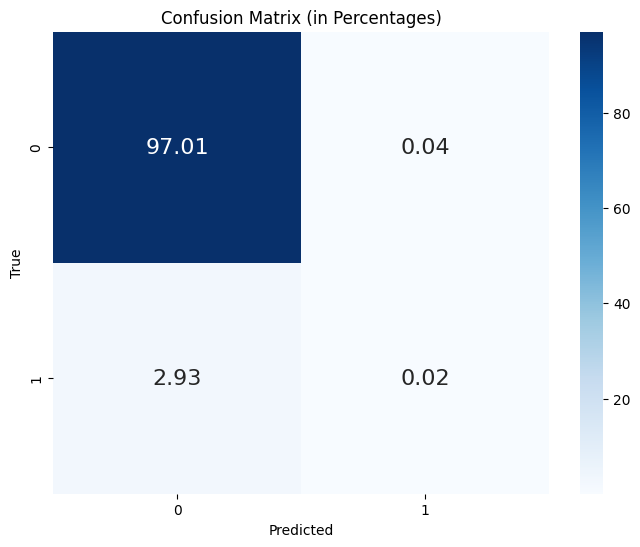

In [121]:
# plotting the confusion matrix
cm = confusion_matrix(y_train, pred)

# Calculate the total number of samples
total_samples = np.sum(cm)

# Convert the values in the confusion matrix to percentages
cm_percent = (cm / total_samples) * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (in Percentages)')
plt.show()


In [122]:
x_test = x_test[selected_columns]
x_train = x_train[selected_columns]
pred = model.predict(x_test)

In [123]:
accuracy_score(pred, y_test)

0.9333333333333333

In [124]:
model

LogisticRegression(max_iter=10000)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have pred and y_test
# Compute accuracy
accuracy = accuracy_score(y_test, pred)

# Compute precision
precision = precision_score(y_test, pred)

# Compute recall
recall = recall_score(y_test, pred)

# Compute F1-score
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9333333333333333
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\sylge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


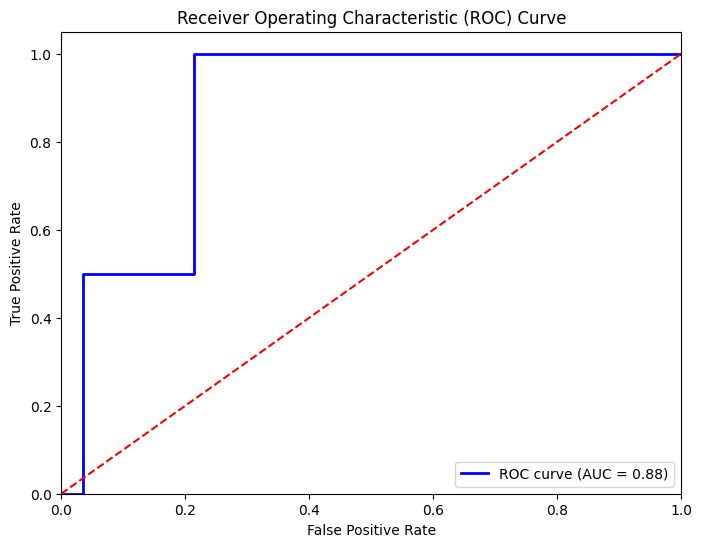

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
probs = model.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the AUC score
auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Podejrzanie dobre wynik - może zacznijmy z wagą

In [127]:
model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(selected_df, y_train

LogisticRegression(class_weight='balanced', max_iter=10000)

In [128]:
pred = model.predict(x_test)

# Assuming you already have pred and y_test
# Compute accuracy
accuracy = accuracy_score(y_test, pred)

# Compute precision
precision = precision_score(y_test, pred)

# Compute recall
recall = recall_score(y_test, pred)

# Compute F1-score
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8333333333333334
Precision: 0.2
Recall: 0.5
F1-score: 0.2857142857142857


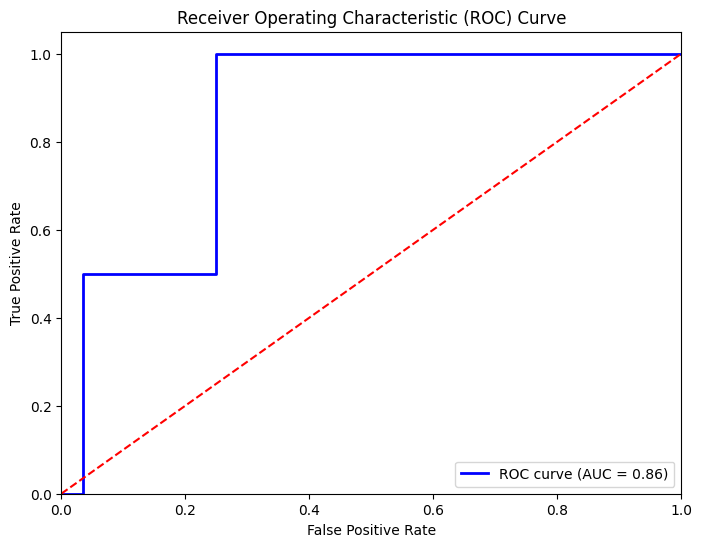

In [129]:


# Calculate the probabilities of the positive class
probs = model.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the AUC score
auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()